<a href="https://colab.research.google.com/github/susik17/myprojects/blob/main/lung_Cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip


--2024-05-25 02:38:24--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.160.163, 52.219.156.39, 16.12.36.75, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.160.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  10.6MB/s    in 27s     

2024-05-25 02:38:52 (5.46 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



Importing neccessary libraries


In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

Visualizing the dataset

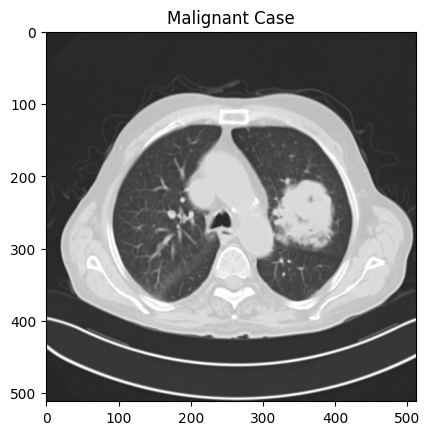

In [28]:
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")
plt.title("Malignant Case")
plt.imshow(img)

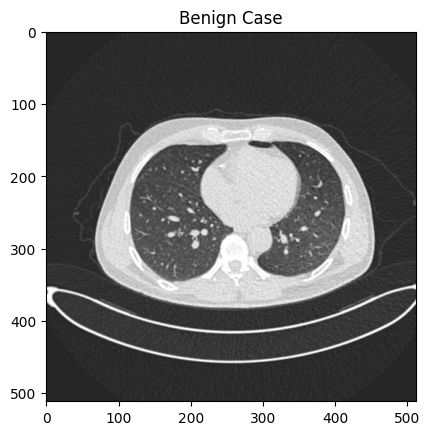

In [40]:

img_benign = cv2.imread("Lung_cancer_dataset/Train/Benign cases/Benign case (11).jpg")
plt.title("Benign Case")
plt.imshow(img ,cmap="hot")



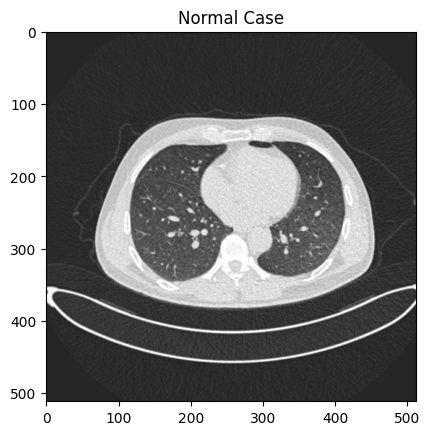

In [33]:
img = cv2.imread("Lung_cancer_dataset/Train/Normal cases/Normal case (10).jpg")
plt.title("Normal Case")
plt.imshow(img)

In [9]:
img_width = 64
img_height = 64

Preparing the data
We have used ImageDataGenerator from keras, in the subsequent cells, to fetch the images along with their labels to train the neural network

In [10]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [11]:
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")

Found 970 images belonging to 3 classes.


In [12]:
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")

Found 107 images belonging to 3 classes.


The labels
We will use one hot encoding here as our data is categorical in nature

In [13]:
train_data_generator.next()[1]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

The Model

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.4))

model.add(Dense(3, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [16]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [17]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]

In [18]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 12s 167ms/step - loss: 0.9799 - accuracy: 0.4948 - val_loss: 0.9630 - val_accuracy: 0.5140
Epoch 2/50
61/61 [==============================] - 9s 145ms/step - loss: 0.9297 - accuracy: 0.5289 - val_loss: 0.9258 - val_accuracy: 0.4486
Epoch 3/50
61/61 [==============================] - 9s 148ms/step - loss: 0.7920 - accuracy: 0.6598 - val_loss: 1.0491 - val_accuracy: 0.4860
Epoch 4/50
61/61 [==============================] - 10s 168ms/step - loss: 0.5942 - accuracy: 0.7660 - val_loss: 1.1797 - val_accuracy: 0.4860
Epoch 5/50
61/61 [==============================] - 9s 145ms/step - loss: 0.4373 - accuracy: 0.8381 - val_loss: 1.1992 - val_accuracy: 0.5327
Epoch 6/50
61/61 [==============================] - 8s 130ms/step - loss: 0.3265 - accuracy: 0.8773 - val_loss: 1.1660 - val_accuracy: 0.6168
Epoch 7/50
61/61 [==============================] - 10s 158ms/step - loss: 0.2723 - accuracy: 0.8866 - val_loss: 1.2272 - val_accuracy: 0.5514
Epo

Preparing Test Data for prediction

In [20]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Test", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")


Found 20 images belonging to 3 classes.


In [21]:
test_data_generator.next()[1]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

Model accuracy and loss trends
Lets visualize the accuracy and loss trends throughout the training process

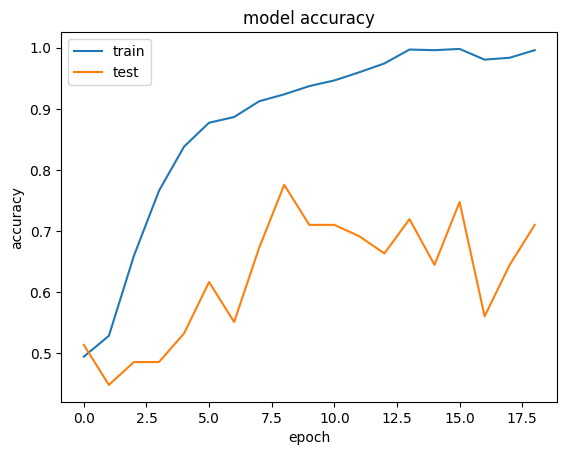

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

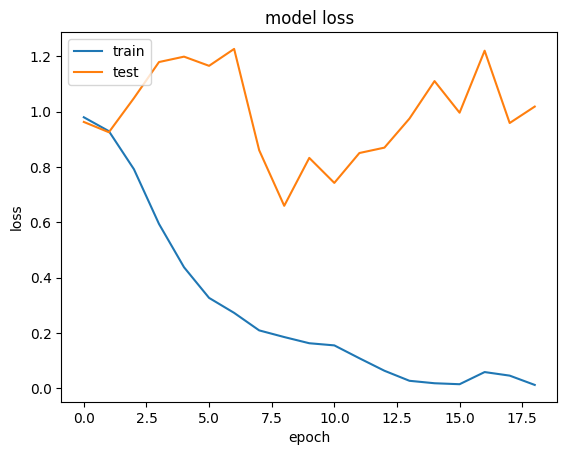

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Visualizing the predictions of the model on unseen data

In [24]:
x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(5):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

1/1 [==============================] - 0s 23ms/step


In [25]:
#Making the Output meaningful using named classes

cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:5]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1

print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Normal', 1: 'Normal', 2: 'Malignant', 3: 'Normal', 4: 'Benign'}
PREDICTIONS: {0: 'Normal', 1: 'Normal', 2: 'Malignant', 3: 'Normal', 4: 'Malignant'}


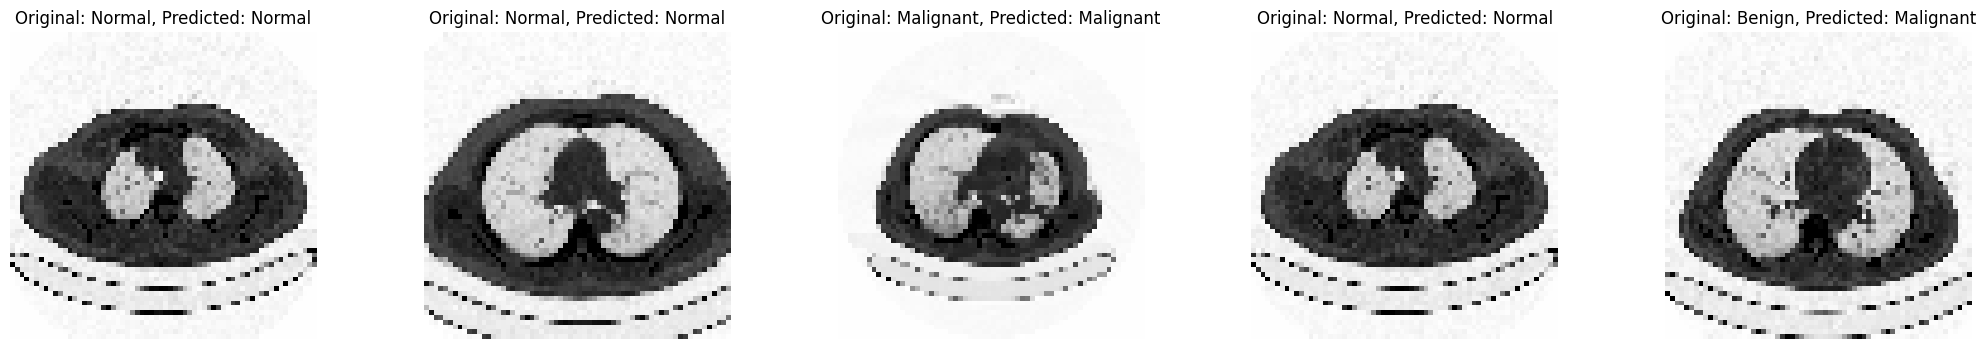

In [26]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()


In [37]:
model.save("lung_cancer_prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
